In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:/DATA/moviereviews.csv')

In [95]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [97]:
len(df)

1938

In [4]:
df['review'][0]

'how do films like mouse hunt get into theatres ? \r\nisn\'t there a law or something ? \r\nthis diabolical load of claptrap from steven speilberg\'s dreamworks studio is hollywood family fare at its deadly worst . \r\nmouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . \r\nwriter adam rifkin and director gore verbinski are the names chiefly responsible for this swill . \r\nthe plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . \r\ndeciding to check out the long-abandoned house , they soon learn that it\'s worth a fortune and set about selling it in auction to the highest bidder . \r\nbut battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . \r\

**Checking for missing data**

In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
len(df)

2000

In [7]:
df.dropna(inplace=True)

**Deleting empty strings**

In [8]:
df[df['review'].str.isspace()].index

Index([  57,   71,  147,  151,  283,  307,  313,  323,  343,  351,  427,  501,
        633,  675,  815,  851,  977, 1079, 1299, 1455, 1493, 1525, 1531, 1763,
       1851, 1905, 1993],
      dtype='int64')

In [10]:
df = df.drop([  57,   71,  147,  151,  283,  307,  313,  323,  343,  351,  427,  501,
        633,  675,  815,  851,  977, 1079, 1299, 1455, 1493, 1525, 1531, 1763,
       1851, 1905, 1993],axis=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**Checking the classes count**

<Axes: xlabel='label', ylabel='count'>

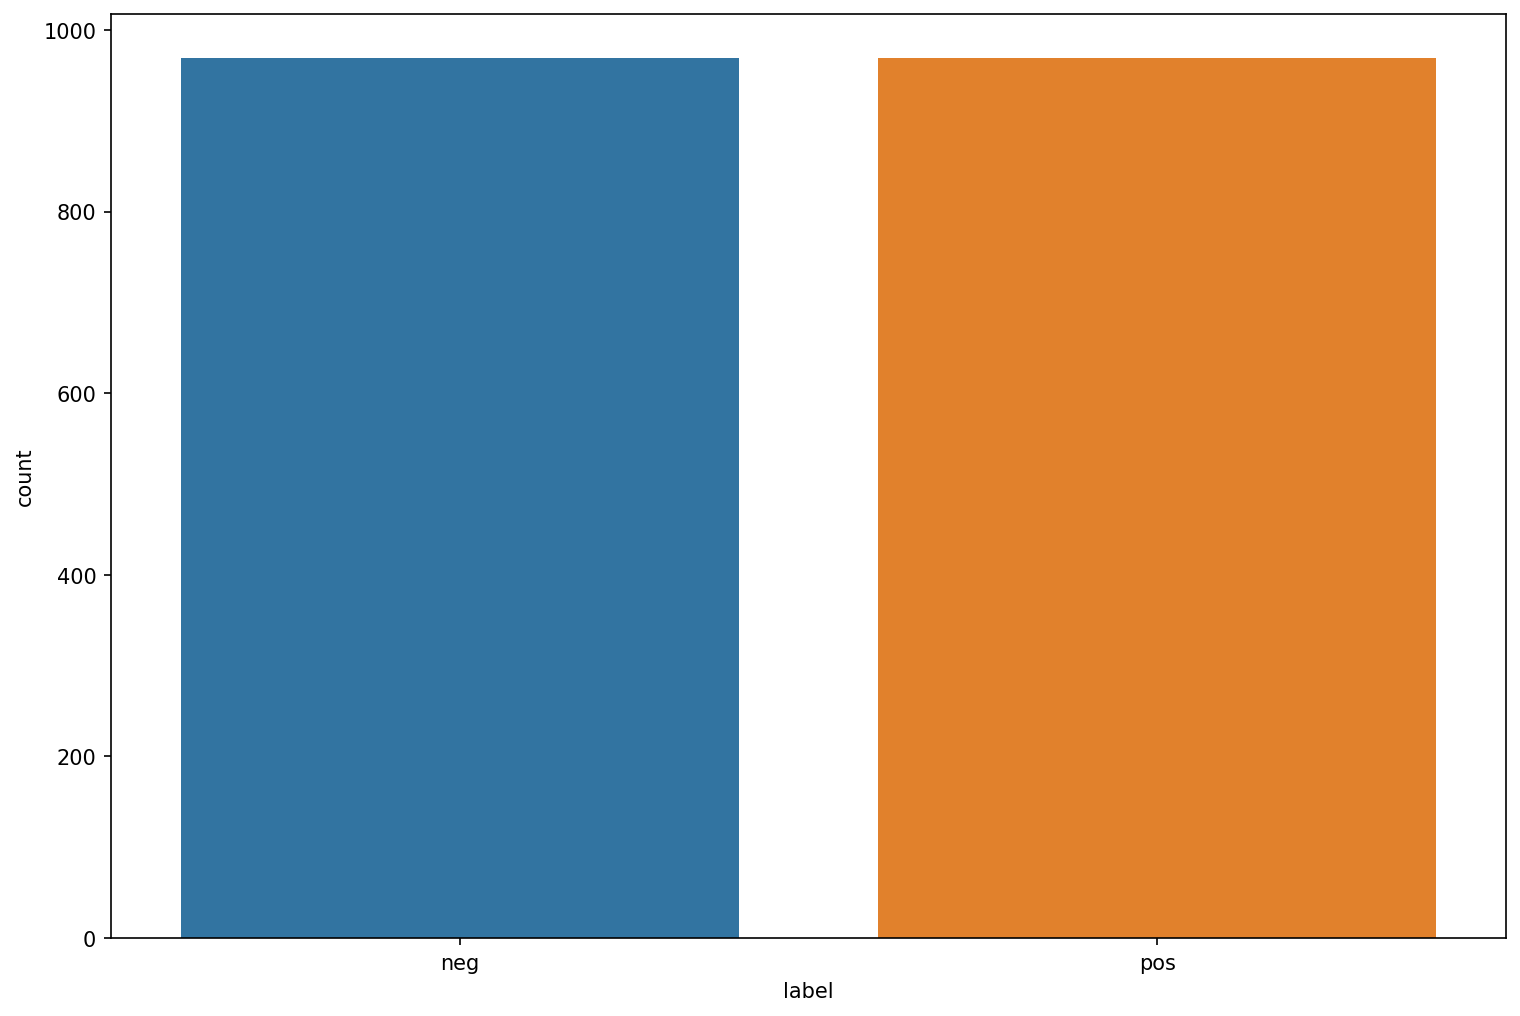

In [49]:
plt.figure(figsize=(12,8),dpi=150)
sns.countplot(data=df,x='label',hue='label')

## EDA on Bag of Words

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [14]:
cv = CountVectorizer(stop_words='english')

In [23]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    

print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [24]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    

print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [73]:
Z = cv.fit_transform(df['review'])

In [94]:
Z

<1938x38596 sparse matrix of type '<class 'numpy.int64'>'
	with 470990 stored elements in Compressed Sparse Row format>

In [76]:
word_counts = Z.sum(axis=0).A1
words = cv.get_feature_names_out()


In [80]:
word_freq = dict(zip(words, word_counts))

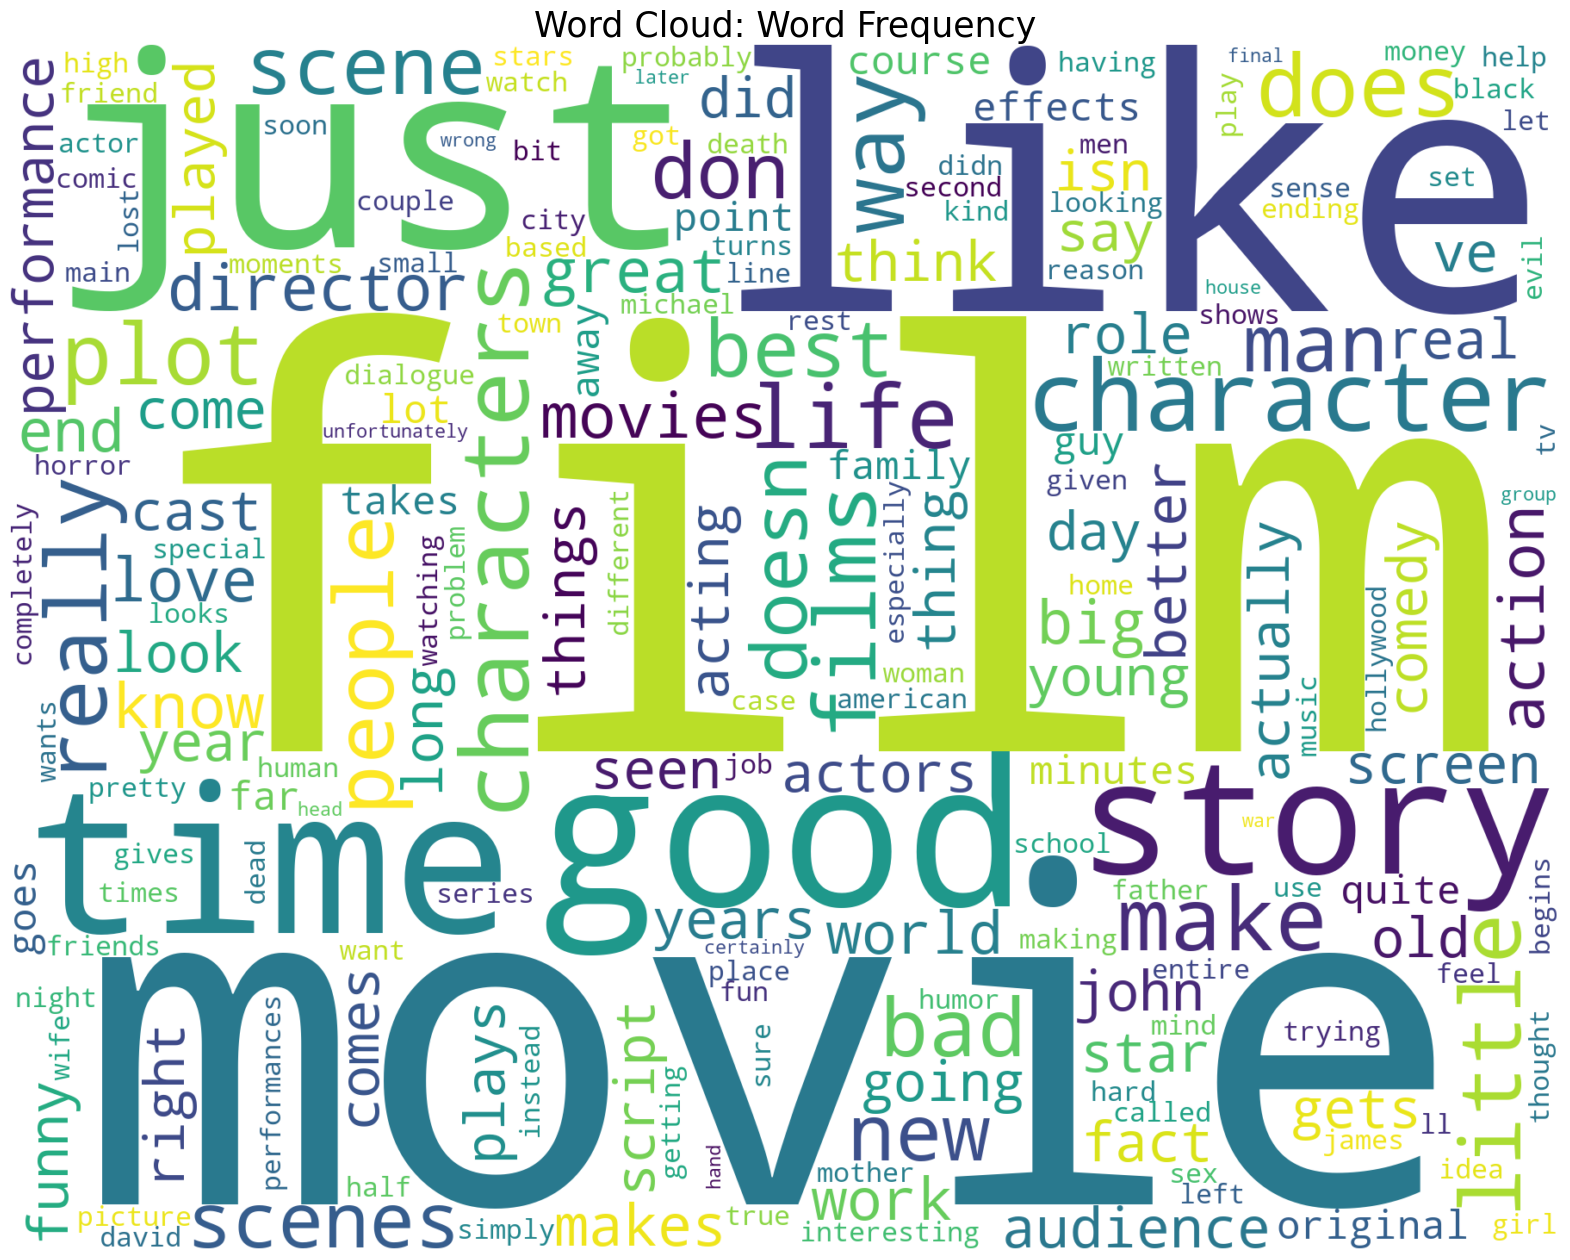

In [84]:
wordcloud = WordCloud(width=1800, height=1400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ukrywamy osie
plt.title('Word Cloud: Word Frequency',fontsize=25)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df['review']

In [27]:
y = df['label']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

### Training a Model


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC,SVC

In [52]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', SVC()),])

In [54]:
param_grid = {
    'tfidf__max_df': [0.75, 1.0],  
    'tfidf__min_df': [1, 3],  
    'tfidf__ngram_range': [(1, 1), (1, 2)],  
    'svc__C': [0.1, 1, 10],  
    'svc__kernel': ['linear', 'rbf'],  
    'svc__gamma': ['scale', 'auto']
}

In [56]:
grid_model=GridSearchCV(pipe,param_grid,scoring='accuracy',n_jobs=-1,verbose=2)

In [57]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf'],
                         'tfidf__max_df': [0.75, 1.0], 'tfidf__min_df': [1, 3],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=2)

In [87]:
grid_model.best_params_

{'svc__C': 10,
 'svc__gamma': 'scale',
 'svc__kernel': 'linear',
 'tfidf__max_df': 1.0,
 'tfidf__min_df': 3,
 'tfidf__ngram_range': (1, 2)}

In [61]:
preds=grid_model.best_estimator_.predict(X_test)

              precision    recall  f1-score   support

         neg       0.84      0.88      0.86       191
         pos       0.88      0.83      0.85       197

    accuracy                           0.86       388
   macro avg       0.86      0.86      0.86       388
weighted avg       0.86      0.86      0.86       388



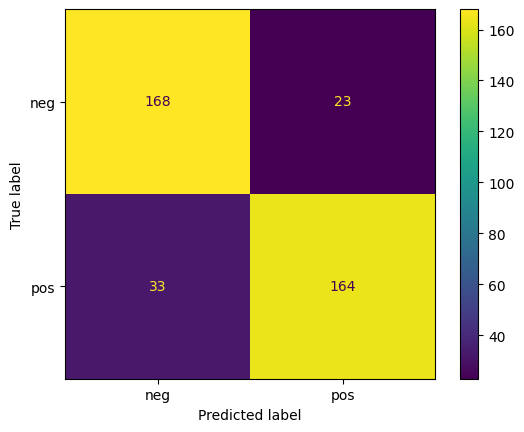

In [62]:
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_predictions(y_test,preds)